In [3]:
using StatsBase
using Plots

data_simple = [0.1, 0.2, 0.7, 0.3, 0.4, 0.8, 0.9, 1]'

1×8 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 0.1  0.2  0.7  0.3  0.4  0.8  0.9  1.0

In [6]:
function kmeans_simple(X, k, max_iter = 100, threshold = 0.001)
    # choose k points without replacement
    centroids = X[:, sample(1:size(X, 2), k, replace = false)]
    # copy to check if centroids moving or not
    new_centroids = copy(centroids)
    
    # start an empty array for our cluster ids. This will hold the cluster assignment
    # for each point in X
    cluster_ids = Array{Int32}(zeros(size(X,2)))
    for i in 1:max_iter
        for col_idx in 1:size(X, 2)
            p = X[:, col_idx]
            # calculate distance between point and centroid
            point_difference = mapslices(x -> x - p, centroids, dims=1)

            # squared Euclidian distance
            distances = mapslices(sum, point_difference .^ 2, dims=1)
            
            # find index of closest centroid
            # store the index with minimum distance
            cluster_ids[col_idx] = findmin(distances)[2][2]
        end

        for cluster_id in 1:size(centroids, 2)
            # find mean of assigned points to that cluster
            new_centroids[:, cluster_id] = mapslices(mean, X[:, cluster_id .== cluster_ids], dims=2)
        end
        
        # measure the distance centroids changed
        center_change = sum(mapslices(x -> sum(x .^ 2), new_centroids .- centroids, dims=2))
        centroids = copy(new_centroids)
        
        if center_change < threshold
            break
        end
    end
    return centroids, cluster_ids
end
            

kmeans_simple (generic function with 3 methods)

In [10]:
simple_result = kmeans_simple(data_simple, 2)

([0.85 0.25], Int32[2, 2, 1, 2, 2, 1, 1, 1])

In [12]:
data_complex = [0.1 0.1; 0.1 0.2; 0.2 0.1;  # our first designed cluster
                0.4 0.4; 0.5 0.3; 0.5 0.4; # second cluster
                0.9 1.0]'

2×7 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.1  0.1  0.2  0.4  0.5  0.5  0.9
 0.1  0.2  0.1  0.4  0.3  0.4  1.0

In [13]:
complex_result = kmeans_simple(data_complex, 3)

([0.13333333333333333 0.4666666666666666 0.9; 0.13333333333333333 0.3666666666666667 1.0], Int32[1, 1, 1, 2, 2, 2, 3])

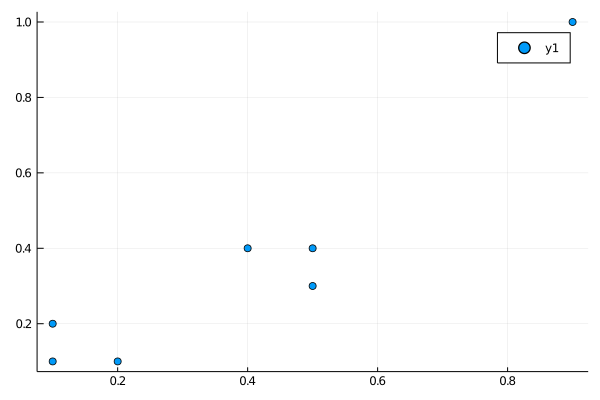

In [14]:
scatter(data_complex[1, :], data_complex[2, :])

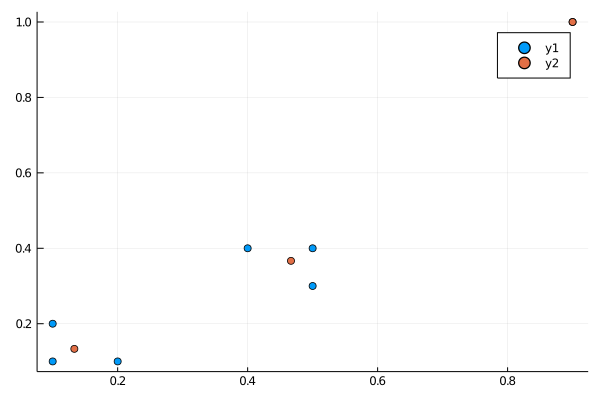

In [15]:
scatter!(complex_result[1][1, :], complex_result[1][2, :])